## Proyecto Final Ciencia de Datos

#### Ciclo 1, 2024
#### Marisol Castellanos - 24010203

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = np.load('proyecto_training_data.npy')

headers = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']



print("Dataset shape:", dataset.shape)

df = pd.DataFrame(dataset, columns=headers)

# dataset con los headers

print("Dataset con headers:")
print(df.head())

#print("Dataset con headers:")
#print(df[:1460])

null_values = df.isnull().sum()

print('Valores nulos para cada columna: \n ', null_values)


Dataset shape: (1460, 6)
Dataset con headers:
   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0
Valores nulos para cada columna: 
  SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64


#### Verificando los nulos y procedemos a imputar la media 

In [3]:

lotfrontage_nulos = 'LotFrontage' 

# Calculate the mean of the specified column, ignoring NaN values
lotfrontage_media = df[lotfrontage_nulos].mean(skipna=True)

# Aca se reemplaza los valores NAN con la media
df[lotfrontage_nulos].fillna(lotfrontage_media, inplace=True)

#Nuevo df sin nulos
print("Nuevo dataframe:")
print(df)
null_values = df.isnull().sum()
print(null_values)

Nuevo dataframe:
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]
SalePrice       0
OverallQual     

### Preparamos los datos en dos conjuntos, uno de entrenamiento y otro de validación


In [4]:
data_array = df.to_numpy()

# Define the proportion for testing data
test_validation = 0.2

# Mezclamos aleatoriamente los datos
np.random.shuffle(data_array)

# Calculamos el indice de los datos
split_index = int(len(data_array) * (1 - test_validation))

# Dividimos los datos en dos conjuntos de Entrenamiento y Prueba:
train_data, test_validation = data_array[:split_index, :], data_array[split_index:, :]

# Los nuevos datasets son:
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_validation.shape)


Training set shape: (1168, 6)
Testing set shape: (292, 6)


### Análisis exploratorio de datos

In [5]:

for i, column in enumerate(df.columns):
    column_data = train_data[:, i]
    mean_value = np.mean(column_data)
    max_value = np.max(column_data)
    min_value = np.min(column_data)
    range_value = np.ptp(column_data)
    std_dev = np.std(column_data)

    print(f" Estadisticos de '{column}':")
    print(f"  Mean: {mean_value}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}")
    print(f"  Rango: {range_value}")
    print(f"  Desviación estandar: {std_dev}\n")

 Estadisticos de 'SalePrice':
  Mean: 182024.94606164383
  Max: 755000.0
  Min: 34900.0
  Rango: 720100.0
  Desviación estandar: 80321.44367253411

 Estadisticos de 'OverallQual':
  Mean: 6.113013698630137
  Max: 10.0
  Min: 1.0
  Rango: 9.0
  Desviación estandar: 1.3752590639450561

 Estadisticos de '1stFlrSF':
  Mean: 1163.0094178082193
  Max: 4692.0
  Min: 334.0
  Rango: 4358.0
  Desviación estandar: 393.4466192583505

 Estadisticos de 'TotRmsAbvGrd':
  Mean: 6.497431506849315
  Max: 14.0
  Min: 2.0
  Rango: 12.0
  Desviación estandar: 1.619125920152194

 Estadisticos de 'YearBuilt':
  Mean: 1971.8056506849316
  Max: 2010.0
  Min: 1872.0
  Rango: 138.0
  Desviación estandar: 29.800002337292465

 Estadisticos de 'LotFrontage':
  Mean: 70.14365668449808
  Max: 313.0
  Min: 21.0
  Rango: 292.0
  Desviación estandar: 21.31172411115893



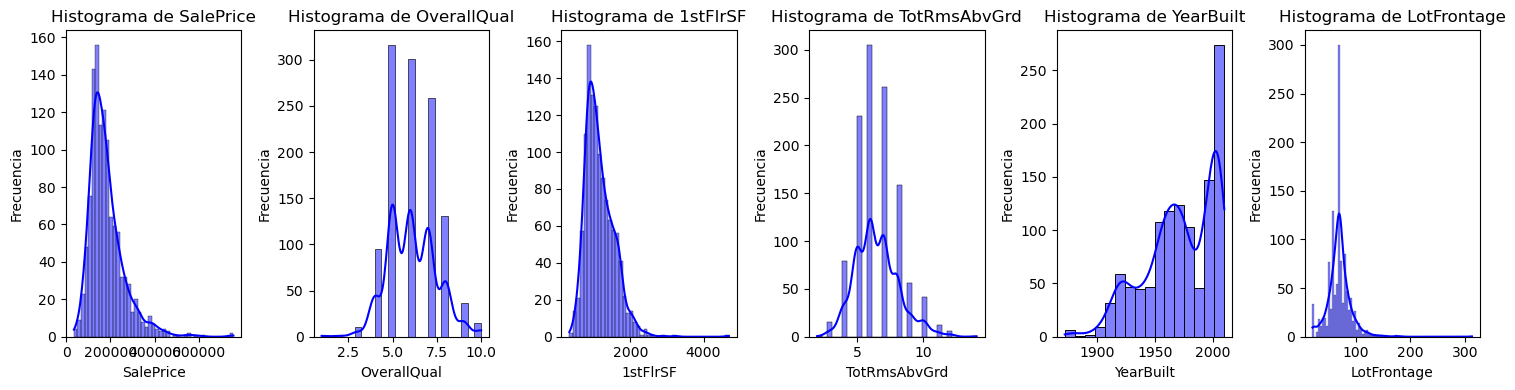

In [6]:
# Creamos las graficas 
fig, axes = plt.subplots(nrows=1, ncols=train_data.shape[1], figsize=(15, 4))

# Veamos el histograma para cada columna de nuestro dataframe
for i, ax in enumerate(axes):
    sns.histplot(train_data[:, i], kde=True, ax=ax, color='blue')
    ax.set_title(f'Histograma de {headers[i]}')
    ax.set_xlabel(headers[i])
    ax.set_ylabel('Frecuencia')
    
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# cargamos el dataset training
dataset = np.load('proyecto_training_data.npy')

# Definimos las columnas
column_names = ['SalePrice ', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

# Convertir a Pandas DataFrame
df = pd.DataFrame(dataset, columns=column_names)

print("DataFrame:")
print(df.head())


DataFrame:
   SalePrice   OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0    208500.0          7.0     856.0           8.0     2003.0         65.0
1    181500.0          6.0    1262.0           6.0     1976.0         80.0
2    223500.0          7.0     920.0           6.0     2001.0         68.0
3    140000.0          7.0     961.0           7.0     1915.0         60.0
4    250000.0          8.0    1145.0           9.0     2000.0         84.0


### Coeficientes de correalcion


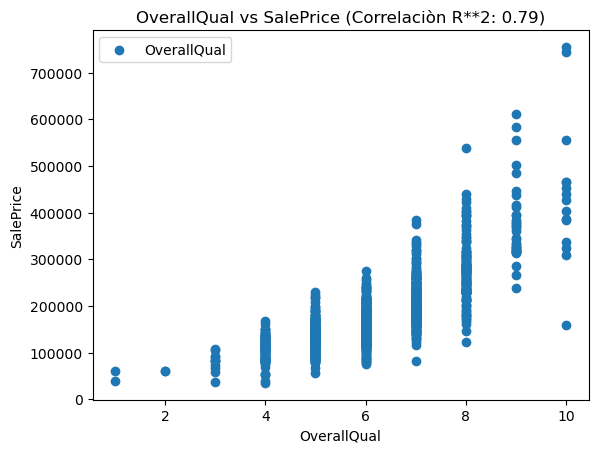

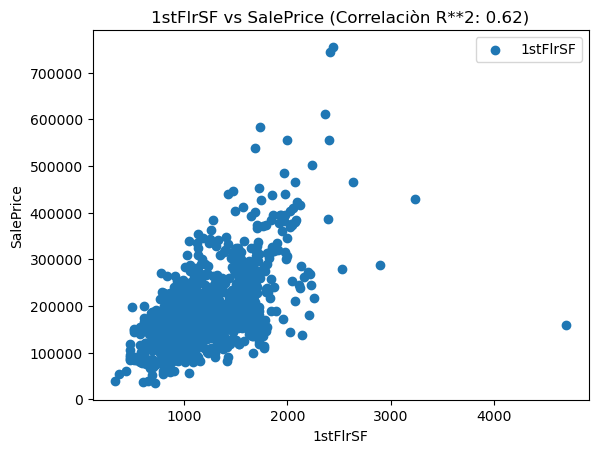

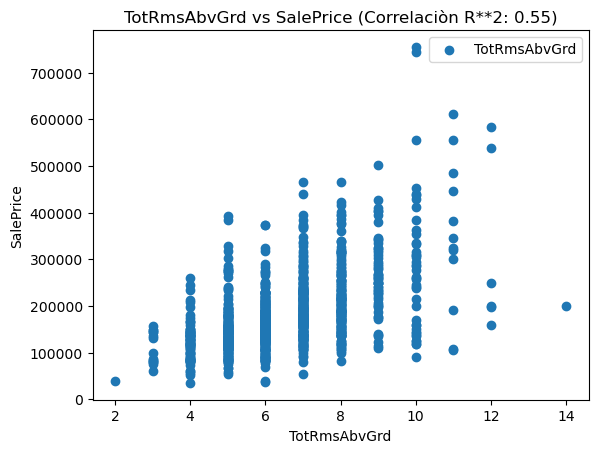

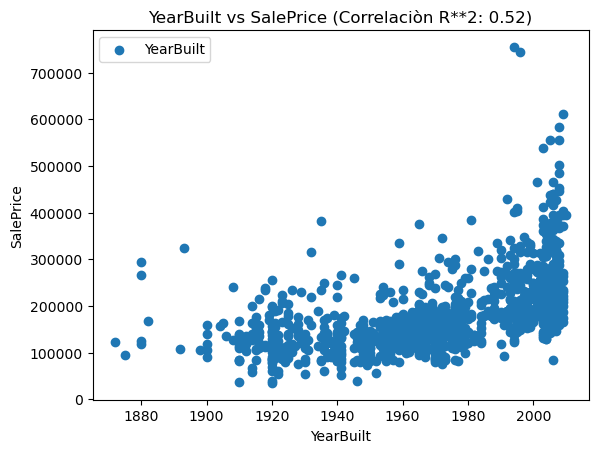

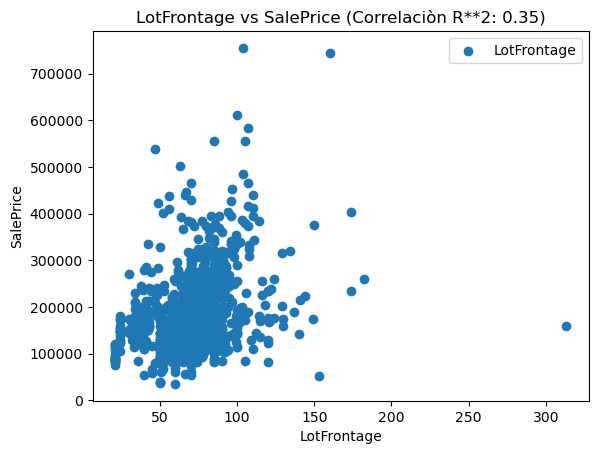

In [8]:
variable_dep= train_data[:, 0]
variable_indep = train_data[:, 1:]

#Calculamos el coeficiente de correlacion entre cada una de las variables 
for i in range(variable_indep.shape[1]):
    coef_corre = np.corrcoef(variable_indep[:, i], variable_dep)[0, 1]

    # Graficamos
    plt.scatter(variable_indep[:, i], variable_dep, label=headers[i+1])
    plt.title(f'{headers[i+1]} vs {headers[0]} (Correlaciòn R**2: {coef_corre:.2f})')
    plt.xlabel(headers[i+1])
    plt.ylabel(headers[0])
    plt.legend()
    
    # Show the plot
    plt.show()


#### Las variables que presentan mayor potencial predictivo son: OverllQual y 1stFlrSF


### Funcion para un modelo de regresion lineal

In [9]:
print(train_data)

[[2.22000000e+05 6.00000000e+00 1.68000000e+03 5.00000000e+00
  1.98800000e+03 7.00499584e+01]
 [2.27680000e+05 7.00000000e+00 1.42800000e+03 6.00000000e+00
  2.00800000e+03 9.10000000e+01]
 [3.94617000e+05 8.00000000e+00 1.93200000e+03 7.00000000e+00
  2.00800000e+03 9.60000000e+01]
 ...
 [2.65000000e+05 7.00000000e+00 1.27700000e+03 7.00000000e+00
  1.99600000e+03 7.90000000e+01]
 [1.31400000e+05 5.00000000e+00 1.14400000e+03 6.00000000e+00
  1.96100000e+03 8.00000000e+01]
 [1.74900000e+05 6.00000000e+00 1.16500000e+03 6.00000000e+00
  1.96600000e+03 8.20000000e+01]]


In [33]:
# Número de filas y columnas en el array train_data
num_rows, num_columns = train_data.shape

# Imprimir el número de elementos
print("Número de filas (observaciones):", num_rows)
print("Número de columnas (variables):", num_columns)


Número de filas (observaciones): 1168
Número de columnas (variables): 6


In [90]:
import numpy as np
import matplotlib.pyplot as plt

# El array train_data contiene los datos de entrenamiento, la primera columna corresponde a la variable dependiente y las demás son independientes.
variable_dep = train_data[:, 0]  # Variable dependiente (y)
variable_indep = train_data[:, 1]  # Primera variable independiente (x) [:1]

# Aseguramos que x sea un array bidimensional (n, 1)
variable_indep = variable_indep.reshape(-1, 1)


#### Cremaos la funcion de entrenamiento lineal

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def regresion_lineal_train(x, y, epochs, print_error_cada, alpha):
    X_b = np.c_[np.ones((len(x), 1)), x]  # Matriz de características con columna de unos
    k = len(x)  # Número de observaciones

    beta = np.random.randn(2, 1)  # Inicialización de parámetros
    error_historico = []
    beta_historico = []

    for epoch in range(epochs):
        predictions = X_b.dot(beta)
        error = (1 / (2 * k)) * np.sum((predictions - y.reshape(-1, 1)) ** 2)
        error_historico.append(error)
        beta_historico.append(beta.copy())  # Almacenamiento de beta

        if epoch % print_error_cada == 0:
            print(f"Epoch {epoch}: Error {error}")

        gradiente_beta = (1 / k) * X_b.T.dot(predictions - y.reshape(-1, 1))
        beta = beta - alpha * gradiente_beta

    return beta_historico, error_historico


In [97]:
def plot_error_history(error_historico):
    plt.plot(error_historico)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title("Descenso del gradiente, epoch = 1000")
    plt.show()


Epoch 0: Error 19792887574.269638
Epoch 200: Error 1416293743.8591726
Epoch 400: Error 1377717345.2849534
Epoch 600: Error 1345757969.7982097
Epoch 800: Error 1319280597.1233728


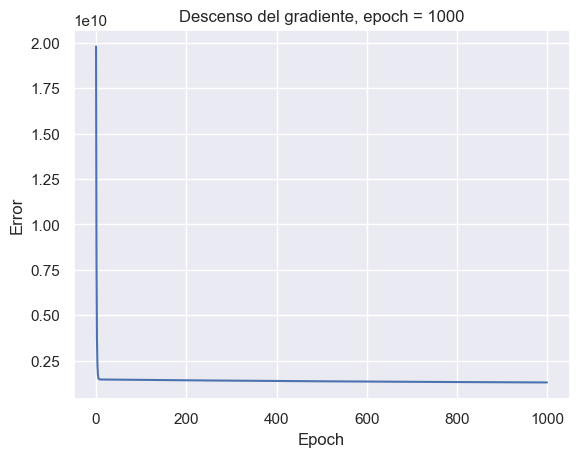

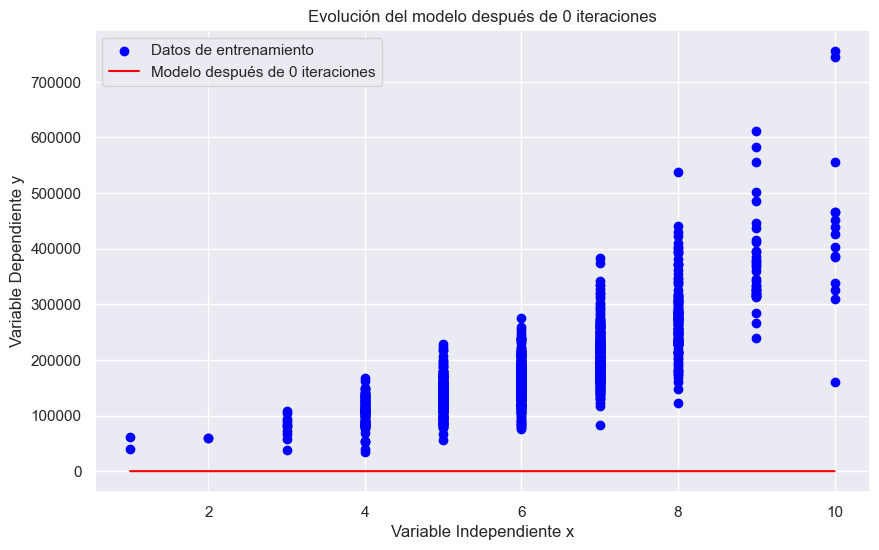

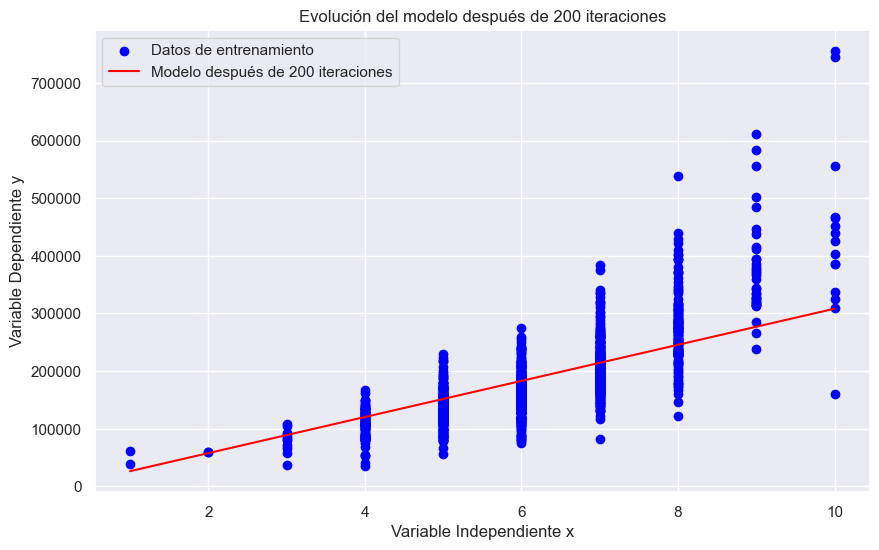

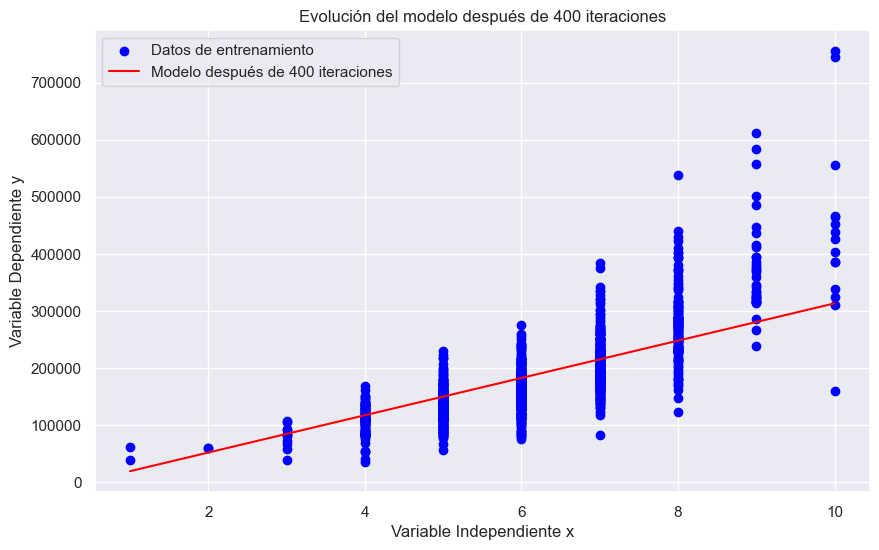

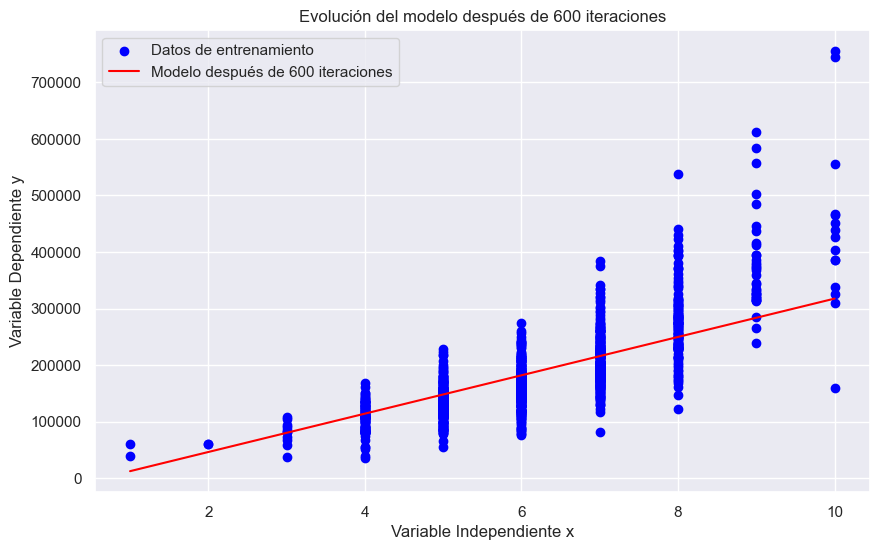

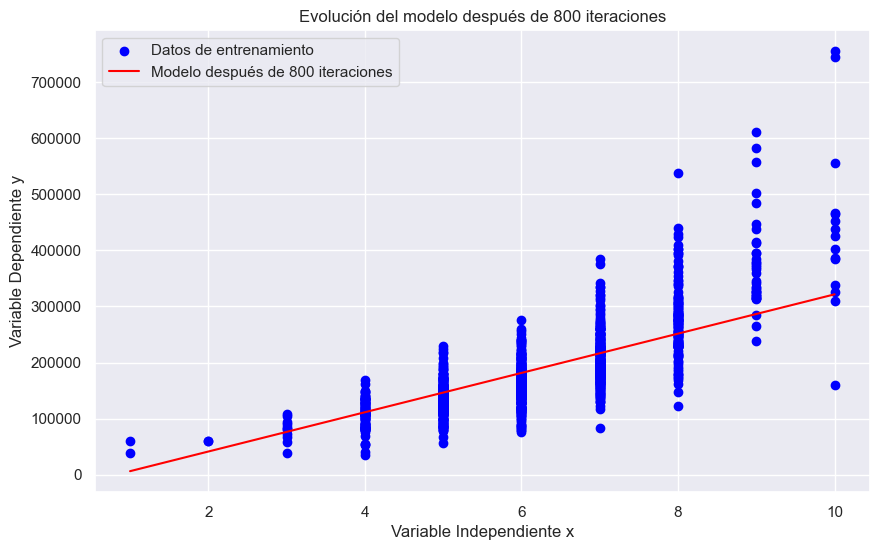

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn para los gráficos
sns.set_theme(style="darkgrid")

def evolucion_temporal_multiple(x, y, beta_historico, print_error_cada):
    x_values = np.linspace(x.min(), x.max(), len(x))
    X_b = np.c_[np.ones((x_values.shape[0], 1)), x_values]
    
    for i, beta in enumerate(beta_historico[::print_error_cada]):
        plt.figure(figsize=(10, 6))
        plt.scatter(x, y, color='blue', label='Datos de entrenamiento')
        y_pred = X_b.dot(beta)
        plt.plot(x_values, y_pred, color='red', label=f'Modelo después de {i * print_error_cada} iteraciones')
        plt.xlabel('Variable Independiente x')
        plt.ylabel('Variable Dependiente y')
        plt.title(f'Evolución del modelo después de {i * print_error_cada} iteraciones')
        plt.legend()
        plt.show()

# Parámetros de entrenamiento
epochs = 1000
print_error_cada = 200
alpha = 0.01  # Tasa de aprendizaje

# Entrenamiento del modelo y obtención del historial de parámetros y errores
beta_historico, error_historico = regresion_lineal_train(variable_indep, variable_dep, epochs, print_error_cada, alpha)

# Visualización del historial de errores
plot_error_history(error_historico)

# Visualización de la evolución del modelo en el tiempo
evolucion_temporal_multiple(variable_indep, variable_dep, beta_historico, print_error_cada)


### Comparacion de los modelos 

In [123]:
import numpy as np

class ModeloDeRegresionLineal:
    def __init__(self, num_caracteristicas):
        # Inicialización de parámetros con un término de intercepción y un coeficiente por característica
        self.beta = np.random.randn(num_caracteristicas + 1, 1)

modelo = ModeloDeRegresionLineal(num_caracteristicas=X_entrenamiento.shape[1])


In [124]:
def entrenar(self, X, y, epochs, alpha):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añadir columna de unos
    for epoch in range(epochs):
        y_pred = X_b.dot(self.beta)
        error = (1 / (2 * len(X))) * np.sum((y_pred - y.reshape(-1, 1)) ** 2)
        self.beta -= alpha * (1 / len(X)) * X_b.T.dot(y_pred - y.reshape(-1, 1))


In [125]:
def entrenar(self, X, y, epochs, alpha):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añadir columna de unos
    self.error_historico = []
    self.beta_historico = {}
    
    for epoch in range(epochs):
        # [La misma lógica del descenso de gradiente]
        self.error_historico.append(error)
        self.beta_historico[epoch] = self.beta.copy()


In [126]:
def graficar_error(self):
    plt.plot(self.error_historico)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Error a lo largo de las iteraciones')
    plt.show()


In [127]:
def graficar_modelo(self, X, y, n):
    plt.scatter(X, y, color='blue', label='Datos reales')
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    for epoch in range(0, len(self.beta_historico), n):
        y_pred = X_b.dot(self.beta_historico[epoch])
        plt.plot(X, y_pred, label=f'Iteración {epoch}')
        
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Evolución del Modelo de Regresión Lineal en el Tiempo')
    plt.legend()
    plt.show()


In [128]:
from sklearn.linear_model import LinearRegression

# En la clase ModeloDeRegresionLineal añadimos:
def entrenar_sklearn(self, X, y):
    self.modelo_sklearn = LinearRegression()
    self.modelo_sklearn.fit(X, y)

def predecir_sklearn(self, X):
    return self.modelo_sklearn.predict(X)

def predecir_manual(self, X):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(self.beta)


In [129]:
# Fuera de la clase, después de entrenar ambos modelos, haríamos:
X_validacion_b = np.c_[np.ones((X_validacion.shape[0], 1)), X_validacion]
predicciones_manuales = modelo.predecir_manual(X_validacion_b)
predicciones_sklearn = modelo.predecir_sklearn(X_validacion_b)

# Calcular los errores
error_manual = mean_squared_error


AttributeError: 'ModeloDeRegresionLineal' object has no attribute 'predecir_manual'

In [122]:
# Asumiendo que la primera columna de train_data y test_validation es la variable dependiente (y)
# y las restantes son las variables independientes (X)

# Datos de entrenamiento
X_entrenamiento = train_data[:, 1:]
y_entrenamiento = train_data[:, 0]

# Datos de validación
X_validacion = test_validation[:, 1:]
y_validacion = test_validation[:, 0]

# Asegúrate de que los datos de entrenamiento y validación están en el formato correcto
# Si X es unidimensional, necesitas hacer un reshape
X_entrenamiento = X_entrenamiento.reshape(-1, 1) if X_entrenamiento.ndim == 1 else X_entrenamiento
X_validacion = X_validacion.reshape(-1, 1) if X_validacion.ndim == 1 else X_validacion

# Crear la matriz de características con la columna de unos para el intercepto
X_entrenamiento_b = np.c_[np.ones((X_entrenamiento.shape[0], 1)), X_entrenamiento]
X_validacion_b = np.c_[np.ones((X_validacion.shape[0], 1)), X_validacion]

# Instanciar y entrenar el modelo de comparación
modelo_comparativo = ModeloComparativo(beta_historico[-1])  # Usar el último beta del entrenamiento manual
modelo_comparativo.entrenar_sklearn(X_entrenamiento_b, y_entrenamiento)

# Hacer predicciones en el conjunto de validación
predicciones_manual, predicciones_sklearn, predicciones_media = modelo_comparativo.predecir(X_validacion_b)

# Aquí puedes calcular el error de tus predicciones para comparar los modelos
# Por ejemplo, podrías calcular el error cuadrático medio
from sklearn.metrics import mean_squared_error

error_manual = mean_squared_error(y_validacion, predicciones_manual.flatten())
error_sklearn = mean_squared_error(y_validacion, predicciones_sklearn)
error_media = mean_squared_error(y_validacion, predicciones_media.flatten())

print(f"Error manual: {error_manual}")
print(f"Error sklearn: {error_sklearn}")
print(f"Error promedio de ambos modelos: {error_media}")


ValueError: shapes (292,7) and (2,1) not aligned: 7 (dim 1) != 2 (dim 0)